# How to use PCA in logistic regression

https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

https://www.geeksforgeeks.org/principal-component-analysis-with-python/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df= pd.read_csv('/home/wojciech/Pulpit/1/Stroke_Prediction_NUM.csv')
print(df.shape)

df.head(5)

(29062, 20)


,Unnamed: 0,ID,Gender,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Stroke,Age_years,Age_years_10,Gender_C,Ever_Married_C,Type_Of_Work_C,Residence_C,Smoking_Status_C,Age_years_10_C
0,0,30650,Male,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,58.093151,"(53.126, 59.076]",1,1,2,1,1,5
1,1,57008,Female,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,70.076712,"(65.121, 74.11]",0,1,2,0,0,7
2,2,53725,Female,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0,52.041096,"(48.082, 53.126]",0,1,2,1,0,4
3,3,41553,Female,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0,75.104110,"(74.11, 82.137]",0,1,3,0,1,8
4,4,16167,Female,0,0,Yes,Private,Rural,77.67,32.3,smokes,0,32.024658,"(29.055, 36.058]",0,1,2,0,2,1


### <span style = "color: blue"> Analysis of the result variable's balance level </span>

In [2]:
del df['Unnamed: 0']
df.Stroke.value_counts(dropna = False, normalize=True)

0    0.981144
1    0.018856
Name: Stroke, dtype: float64

In [3]:
df.columns

Index(['ID', 'Gender', 'Hypertension', 'Heart_Disease', 'Ever_Married',
       'Type_Of_Work', 'Residence', 'Avg_Glucose', 'BMI', 'Smoking_Status',
       'Stroke', 'Age_years', 'Age_years_10', 'Gender_C', 'Ever_Married_C',
       'Type_Of_Work_C', 'Residence_C', 'Smoking_Status_C', 'Age_years_10_C'],
      dtype='object')

### <span style = "color: blue"> Split into test and result set </span>

In [4]:
df2 = df[['Hypertension','Heart_Disease','Avg_Glucose','BMI','Stroke','Age_years','Gender_C','Ever_Married_C','Type_Of_Work_C','Residence_C','Smoking_Status_C','Age_years_10_C']]

In [5]:
y = df2['Stroke']
X = df2.drop('Stroke', axis=1)

In [6]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.33, stratify = y, random_state = 148)

print ('Zbiór X treningowy: ',Xtrain.shape)
print ('Zbiór X testowy:    ', Xtest.shape)
print ('Zbiór y treningowy: ', ytrain.shape)
print ('Zbiór y testowy:    ', ytest.shape)

Zbiór X treningowy:  (19471, 11)
Zbiór X testowy:     (9591, 11)
Zbiór y treningowy:  (19471,)
Zbiór y testowy:     (9591,)


In [7]:
print("ytrain = 0: ", sum(ytrain == 0))
print("ytrain = 1: ", sum(ytrain == 1))

ytrain = 0:  19104
ytrain = 1:  367


In [8]:
Proporcja = sum(ytrain == 0) / sum(ytrain == 1) 
Proporcja = np.round(Proporcja, decimals=0)
Proporcja = Proporcja.astype(int)
print('Ilość 0 Stroke na 1 Stroke: ', Proporcja)

Ilość 0 Stroke na 1 Stroke:  52


In [9]:
ytrain_OVSA = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0) 
ytrain_OVSA.count()

19084

We have increased the number of result variables 1. We now have the same number of rows of result variables and independent variables. We are now introducing new additional variables 1 to the training set.

In [10]:
Xtrain_OVSA = pd.concat([Xtrain.loc[ytrain==1, :]] * Proporcja, axis = 0)
ytrain_OVSA.count()

19084

In [11]:
ytrain_OVSA = pd.concat([ytrain, ytrain_OVSA], axis = 0).reset_index(drop = True)
Xtrain_OVSA = pd.concat([Xtrain, Xtrain_OVSA], axis = 0).reset_index(drop = True)

print("ilość elementów w zbiorze Xtrain:     ", Xtrain.BMI.count())
print("ilość elementów w zbiorze Xtrain_OVSA: ", Xtrain_OVSA.BMI.count())
print("ilość elementów w zbiorze ytrain:     ", ytrain.count())
print("ilość elementów w zbiorze ytrain_OVSA: ", ytrain_OVSA.count())

ilość elementów w zbiorze Xtrain:      19471
ilość elementów w zbiorze Xtrain_OVSA:  38555
ilość elementów w zbiorze ytrain:      19471
ilość elementów w zbiorze ytrain_OVSA:  38555


Result set balance level:

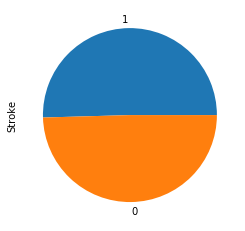

In [12]:
ytrain_OVSA.value_counts(dropna = False, normalize=True).plot(kind='pie')

### <span style = "color: blue"> Logistic regression model </span>

In [13]:
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR = LogisticRegression(warm_start = True)
LR_Grid = GridSearchCV(LR, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = -1, cv=2)

LR_Grid.fit(Xtrain_OVSA, ytrain_OVSA) 
y_pred_LRC = LR_Grid.predict(Xtest)

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model assessment:

Recall Training data:      0.7956
Precision Training data:   0.7522
----------------------------------------------------------------------
Recall Test data:          0.7735
Precision Test data:       0.0517
----------------------------------------------------------------------
Confusion Matrix Test data
[[6840 2570]
 [  41  140]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      9410
           1       0.05      0.77      0.10       181

    accuracy                           0.73      9591
   macro avg       0.52      0.75      0.47      9591
weighted avg       0.98      0.73      0.83      9591



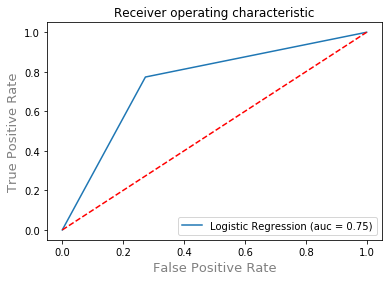

auc 0.7501834770815108


In [14]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

print("Recall Training data:     ", np.round(recall_score(ytrain_OVSA, LR_Grid.predict(Xtrain_OVSA)), decimals=4))
print("Precision Training data:  ", np.round(precision_score(ytrain_OVSA, LR_Grid.predict(Xtrain_OVSA)), decimals=4))
print("----------------------------------------------------------------------")
print("Recall Test data:         ", np.round(recall_score(ytest, LR_Grid.predict(Xtest)), decimals=4)) 
print("Precision Test data:      ", np.round(precision_score(ytest, LR_Grid.predict(Xtest)), decimals=4))
print("----------------------------------------------------------------------")
print("Confusion Matrix Test data")
print(confusion_matrix(ytest, LR_Grid.predict(Xtest)))
print("----------------------------------------------------------------------")
print(classification_report(ytest, LR_Grid.predict(Xtest)))
y_pred_proba = LR_Grid.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_LRC)
auc = metrics.roc_auc_score(ytest, y_pred_LRC)
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.show()
print('auc',auc)

## Principal component analysis (PCA)

Standardization of Xtrain_OVSA and Xtest variables

In [15]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X_train_PCA = sc.fit_transform(Xtrain_OVSA) 
X_test_PCA = sc.transform(Xtest)

In [16]:
print(X_train_PCA.shape)
print(X_test_PCA.shape)

(38555, 11)
(9591, 11)


## PCA transformation of two variables

In [17]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 2) 
  
X_train_PCA2 = pca.fit_transform(X_train_PCA) 
X_test_PCA2 = pca.transform(X_test_PCA) 

In [18]:
pca.fit(X_train_PCA2)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([0.63231701, 0.36768299])

In [20]:
pca.components_

array([[1., 0.],
       [0., 1.]])

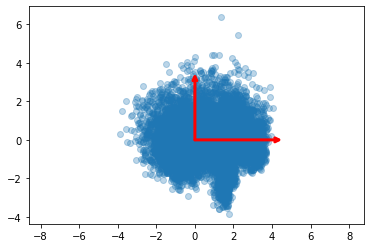

In [21]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=3,
                    color='red',
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X_test_PCA2[:, 0], X_test_PCA2[:, 1], alpha=0.3)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

## We substitute again for the logistic regression model

In [22]:
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR = LogisticRegression(warm_start = True)
LR_Grid2 = GridSearchCV(LR, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = -1, cv=2)

LR_Grid2.fit(X_train_PCA2, ytrain_OVSA) 
y_pred_LRC2 = LR_Grid2.predict(X_test_PCA2)

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall Training data:      0.782
Precision Training data:   0.7434
----------------------------------------------------------------------
Recall Test data:          0.7901
Precision Test data:       0.051
----------------------------------------------------------------------
Confusion Matrix Test data
[[6751 2659]
 [  38  143]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.72      0.83      9410
           1       0.05      0.79      0.10       181

    accuracy                           0.72      9591
   macro avg       0.52      0.75      0.46      9591
weighted avg       0.98      0.72      0.82      9591



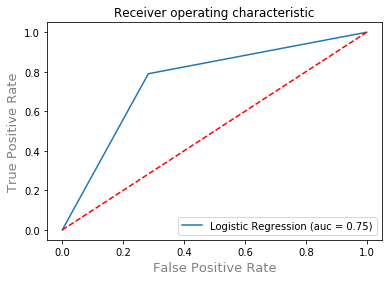

auc 0.7537417582094985


In [23]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

print("Recall Training data:     ", np.round(recall_score(ytrain_OVSA, LR_Grid2.predict(X_train_PCA2)), decimals=4))
print("Precision Training data:  ", np.round(precision_score(ytrain_OVSA, LR_Grid2.predict(X_train_PCA2)), decimals=4))
print("----------------------------------------------------------------------")
print("Recall Test data:         ", np.round(recall_score(ytest, LR_Grid2.predict(X_test_PCA2)), decimals=4)) 
print("Precision Test data:      ", np.round(precision_score(ytest, LR_Grid2.predict(X_test_PCA2)), decimals=4))
print("----------------------------------------------------------------------")
print("Confusion Matrix Test data")
print(confusion_matrix(ytest, LR_Grid2.predict(X_test_PCA2)))
print("----------------------------------------------------------------------")
print(classification_report(ytest, LR_Grid2.predict(X_test_PCA2)))
y_pred_proba = LR_Grid2.predict_proba(X_test_PCA2)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_LRC2)
auc = metrics.roc_auc_score(ytest, y_pred_LRC2)
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.show()
print('auc',auc)

In [24]:
print(X_train_PCA2.shape)
print(ytrain.shape)

(38555, 2)
(19471,)


It is clear that PCA improved the auc from 0.750 to 0.753.

## Cluster visualisation
It is possible in such a graphic format only because there are two variables (after the PCA transformation, because there were 11 before). The area for assessing auc classification before and after PCA transformation is similar and is 0.75. now you can see what chapter ka looks like

### For the training set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


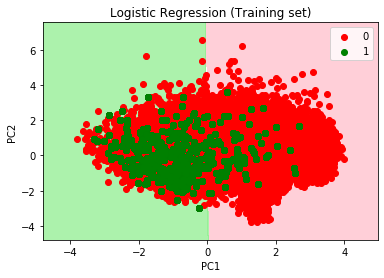

In [25]:
# Predicting the training set 
# result through scatter plot  
from matplotlib.colors import ListedColormap 
  
X_set, y_set = X_train_PCA2, ytrain_OVSA 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, LR_Grid2.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('pink', 'white', 'lightgreen'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
  
plt.title('Logistic Regression (Training set)') 
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() # to show legend 
  
# show scatter plot 
plt.show()

### For the test set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


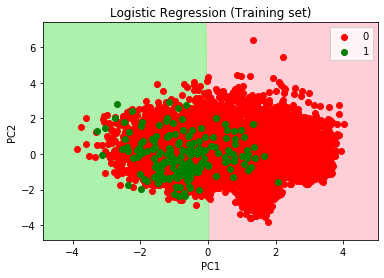

In [26]:
# Predicting the training set 
# result through scatter plot  
from matplotlib.colors import ListedColormap 
  
X_set, y_set = X_test_PCA2, ytest 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, LR_Grid2.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('pink', 'white', 'lightgreen'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
  
plt.title('Logistic Regression (Training set)') 
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() # to show legend 
  
# show scatter plot 
plt.show()

## PCA transformation of three variables

In [27]:
from sklearn.decomposition import PCA 
  
pca3 = PCA(n_components = 3) 
  
X_train_PCA3 = pca3.fit_transform(X_train_PCA) 
X_test_PCA3 = pca3.transform(X_test_PCA) 

In [28]:
pca3.fit(X_train_PCA)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### Variance of the top 3 variables
The higher the variance, the better.

In [29]:
explained_variance = pca3.explained_variance_ratio_ 
explained_variance

array([0.20660751, 0.12013921, 0.10116037])

In [30]:
pca.components_

array([[1., 0.],
       [0., 1.]])

## Again, we substitute for the logistic regression model

In [31]:
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR = LogisticRegression(warm_start = True)
LR_Grid3 = GridSearchCV(LR, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = -1, cv=2)

LR_Grid3.fit(X_train_PCA3, ytrain_OVSA) 
y_pred_LRC3 = LR_Grid3.predict(X_test_PCA3)

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall Training data:      0.7875
Precision Training data:   0.7413
----------------------------------------------------------------------
Recall Test data:          0.7901
Precision Test data:       0.0499
----------------------------------------------------------------------
Confusion Matrix Test data
[[6690 2720]
 [  38  143]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.71      0.83      9410
           1       0.05      0.79      0.09       181

    accuracy                           0.71      9591
   macro avg       0.52      0.75      0.46      9591
weighted avg       0.98      0.71      0.82      9591



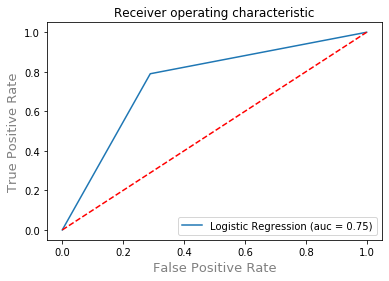

auc 0.7505005254783613


In [32]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

print("Recall Training data:     ", np.round(recall_score(ytrain_OVSA, LR_Grid3.predict(X_train_PCA3)), decimals=4))
print("Precision Training data:  ", np.round(precision_score(ytrain_OVSA, LR_Grid3.predict(X_train_PCA3)), decimals=4))
print("----------------------------------------------------------------------")
print("Recall Test data:         ", np.round(recall_score(ytest, LR_Grid3.predict(X_test_PCA3)), decimals=4)) 
print("Precision Test data:      ", np.round(precision_score(ytest, LR_Grid3.predict(X_test_PCA3)), decimals=4))
print("----------------------------------------------------------------------")
print("Confusion Matrix Test data")
print(confusion_matrix(ytest, LR_Grid3.predict(X_test_PCA3)))
print("----------------------------------------------------------------------")
print(classification_report(ytest, LR_Grid3.predict(X_test_PCA3)))
y_pred_proba = LR_Grid3.predict_proba(X_test_PCA3)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_LRC3)
auc = metrics.roc_auc_score(ytest, y_pred_LRC3)
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.show()
print('auc',auc)

In [34]:
print(X_train_PCA3.shape)
print(ytrain.shape)

(38555, 3)
(19471,)
